In [1251]:
# Import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/Users/macbook/Downloads')
os.getcwd()

df = pd.read_csv("Movado.csv")

The goal is to understand how efficient each marketing channel is to drive orders and sales
- Develop statistical models to evaluate marketing efficiency
- Models should be tested at both daily and weekly levels
- Models should consider seasonality
- Modelling code should be clean with necessary explanations and results should be reproducible
- The deliverable should include modeling codes and a writeup to describe how you understand the data and problem,how do you select variables, how you choose your model, and what the results look like and how we can use the results to direct future marketing decision-making

In [1252]:
df.head()

,Date,orders,sales,Cost_Criteo,Cost_Email,Cost_FB_P,Cost_FB_R,Cost_GDN_P,Cost_GDN_R,Cost_Pint_P,Cost_Pint_R,Cost_Podcasts,Cost_SEM_B,Cost_SEM_NB,Cost_TV
0,1/1/16,45.428571,5324.794286,0.0,0,0.0,49.982143,33.241429,176.453571,0.0,0.0,0.0,117.282143,118.801429,0.0
1,1/2/16,48.642857,5790.447857,0.0,0,0.0,39.867857,18.130714,71.442143,0.0,0.0,0.0,132.391429,71.215000,0.0
2,1/3/16,47.785714,5541.456429,0.0,0,0.0,42.558571,21.433571,84.910714,0.0,0.0,0.0,147.811429,53.144286,0.0
3,1/4/16,81.500000,9972.320714,0.0,0,0.0,45.019286,18.827143,65.668571,0.0,0.0,0.0,161.435000,90.473571,0.0
4,1/5/16,79.714286,9530.935714,0.0,0,0.0,39.481429,15.142857,66.080000,0.0,0.0,0.0,190.327857,110.420714,0.0


In [1253]:
df.shape

(1308, 15)

In [1254]:
df.dtypes

Date              object
orders           float64
sales            float64
Cost_Criteo      float64
Cost_Email         int64
Cost_FB_P        float64
Cost_FB_R        float64
Cost_GDN_P       float64
Cost_GDN_R       float64
Cost_Pint_P      float64
Cost_Pint_R      float64
Cost_Podcasts    float64
Cost_SEM_B       float64
Cost_SEM_NB      float64
Cost_TV          float64
dtype: object

In [1255]:
# Find numeber of missing cell 
df.isnull().sum().max()

0

In [1256]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
orders                  float64
sales                   float64
Cost_Criteo             float64
Cost_Email                int64
Cost_FB_P               float64
Cost_FB_R               float64
Cost_GDN_P              float64
Cost_GDN_R              float64
Cost_Pint_P             float64
Cost_Pint_R             float64
Cost_Podcasts           float64
Cost_SEM_B              float64
Cost_SEM_NB             float64
Cost_TV                 float64
dtype: object

In [1257]:
# Few columns have large of amount of zeros, count how many zeros are in each column
(df == 0).astype(int).sum(axis=0)

Date                0
orders              0
sales               0
Cost_Criteo       176
Cost_Email       1308
Cost_FB_P          34
Cost_FB_R           0
Cost_GDN_P        832
Cost_GDN_R          8
Cost_Pint_P        29
Cost_Pint_R       256
Cost_Podcasts     579
Cost_SEM_B          0
Cost_SEM_NB         2
Cost_TV           673
dtype: int64

In [1258]:
# Cost email column has all 0, drop
df['Cost_Email'].value_counts()
df = df.drop(['Cost_Email'], axis=1)

# Calculate purchase price per order, call it  'price'
df['Price'] = df['sales']/df['orders']

In [1259]:
# get the week number in a year, Month, and Season based on Date
df['Week_Num'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

# setup a dictionary where 1 = spring, 2 = summer, 3 = fall and 4 = winter
seasons = [4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
month_to_season = dict(zip(range(1,13), seasons))
month_to_season 
df['Season'] = df.Month.map(month_to_season) 

In [1260]:
# Calcuate ratios between dollar spent on each channel to sales
df['Criteo/sales'] = df['Cost_Criteo']/df['sales']
df['FB_P/sales'] = df['Cost_FB_P']/df['sales']
df['FB_R/sales'] = df['Cost_FB_R']/df['sales']
df['GDN_P/sales'] = df['Cost_GDN_P']/df['sales']
df['GDN_R/sales'] = df['Cost_GDN_R']/df['sales']
df['Pint_P/sales'] = df['Cost_Pint_P']/df['sales']
df['Pint_R/sales'] = df['Cost_Pint_R']/df['sales']
df['SEM_B/sales'] = df['Cost_SEM_B']/df['sales']
df['SEM_NB/sales'] = df['Cost_SEM_NB']/df['sales']
df['Podcasts/sales'] = df['Cost_Podcasts']/df['sales']
df['TV/sales'] = df['Cost_TV']/df['sales']

In [1261]:
df.sample(5)

,Date,orders,sales,Cost_Criteo,Cost_FB_P,Cost_FB_R,Cost_GDN_P,Cost_GDN_R,Cost_Pint_P,Cost_Pint_R,...,FB_P/sales,FB_R/sales,GDN_P/sales,GDN_R/sales,Pint_P/sales,Pint_R/sales,SEM_B/sales,SEM_NB/sales,Podcasts/sales,TV/sales
500,2017-05-15,60.785714,8340.440714,30.006102,435.615714,108.679286,0.000000,6.933571,48.737143,15.678571,...,0.052229,0.013030,0.000000,0.000831,0.005843,0.001880,0.009503,0.003956,0.115196,0.000000
69,2016-03-10,30.642857,3550.571429,0.000000,158.761429,92.990000,10.676429,11.868571,13.310714,0.000000,...,0.044714,0.026190,0.003007,0.003343,0.003749,0.000000,0.017988,0.011193,0.058341,0.000000
1054,2018-11-20,284.142857,35874.752140,142.182367,5761.670714,1566.193571,0.000000,26.620714,216.454286,23.507143,...,0.160605,0.043657,0.000000,0.000742,0.006034,0.000655,0.010988,0.010575,0.073663,0.167175
56,2016-02-26,26.000000,3171.966429,0.000000,77.852857,78.100714,14.726429,17.417143,23.965000,0.000000,...,0.024544,0.024622,0.004643,0.005491,0.007555,0.000000,0.021190,0.012148,0.000000,0.000000
510,2017-05-25,51.714286,7257.862857,13.990962,1061.554286,159.003571,0.000000,13.300000,55.055000,6.170000,...,0.146263,0.021908,0.000000,0.001832,0.007586,0.000850,0.009934,0.003506,0.314495,0.000000


In [1262]:
df.describe()

,orders,sales,Cost_Criteo,Cost_FB_P,Cost_FB_R,Cost_GDN_P,Cost_GDN_R,Cost_Pint_P,Cost_Pint_R,Cost_Podcasts,...,FB_P/sales,FB_R/sales,GDN_P/sales,GDN_R/sales,Pint_P/sales,Pint_R/sales,SEM_B/sales,SEM_NB/sales,Podcasts/sales,TV/sales
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,...,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,95.186435,12198.738598,40.700948,1715.585807,463.208914,7.164540,21.495212,114.542351,20.382497,612.198295,...,0.119708,0.033166,0.001048,0.002309,0.009872,0.001620,0.010999,0.008430,0.062565,0.028607
std,125.261276,16264.956604,57.257554,3373.736007,948.556932,12.597595,29.153344,193.691279,30.774349,1012.008789,...,0.076263,0.022854,0.002009,0.003156,0.007627,0.001319,0.004037,0.005858,0.103227,0.039458
min,22.714286,2608.207143,0.000000,0.000000,13.970714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002482,0.000000,0.000000,0.000000,0.000000,0.003593,0.000000,0.000000,0.000000
25%,51.839286,6686.075715,11.784760,500.481429,149.430714,0.000000,3.420714,47.506964,7.487500,0.000000,...,0.062743,0.019336,0.000000,0.000411,0.005465,0.000735,0.008649,0.004729,0.000000,0.000000
50%,61.321429,7960.246071,26.127846,852.077857,206.923929,0.000000,10.297857,67.836071,13.459643,119.500000,...,0.105141,0.027395,0.000000,0.001042,0.007978,0.001506,0.010131,0.007171,0.011902,0.000000
75%,83.142857,10090.348748,45.582375,1409.314108,390.141071,12.412321,28.890714,105.314286,20.578214,829.123929,...,0.164443,0.039028,0.001299,0.002921,0.011647,0.002343,0.012111,0.010933,0.084867,0.048618
max,1879.071429,243411.206400,666.212341,39357.307140,17647.035000,91.780714,333.711429,2243.424286,258.049286,6943.932563,...,0.643508,0.232707,0.010674,0.033138,0.078027,0.009778,0.034547,0.076904,0.717033,0.234574


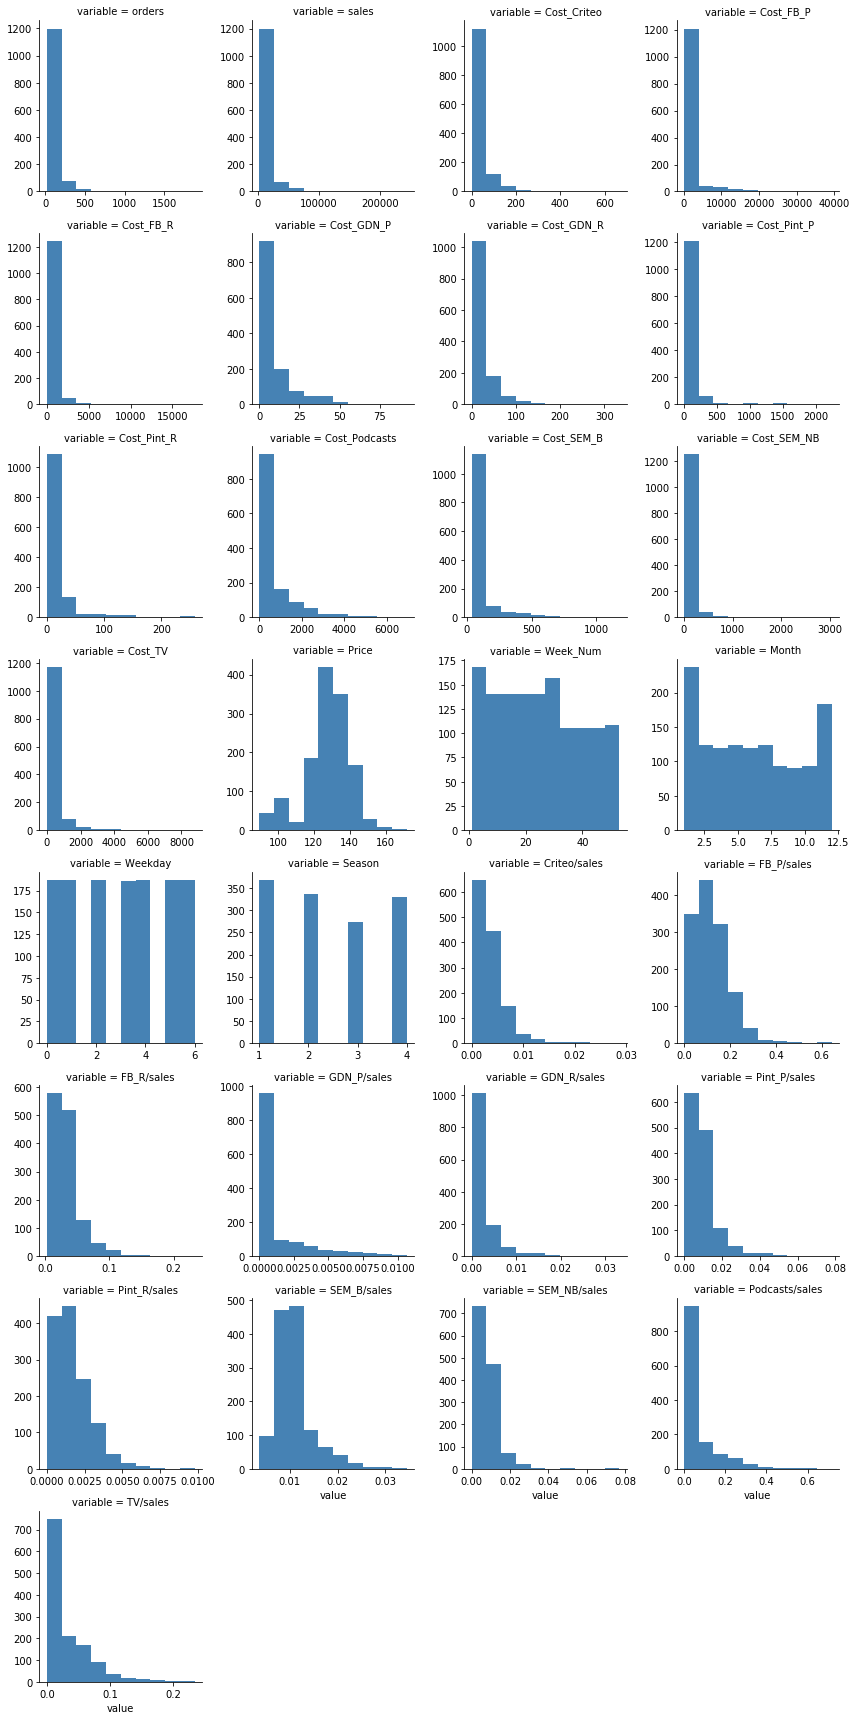

In [1263]:
# Get a quick sense of how the values of each column are distributed
quan = list(df.loc[:, df.dtypes != 'datetime64[ns]'].columns.values)
grid = sns.FacetGrid(pd.melt(df, value_vars=quan),
                     col='variable', col_wrap=4, height=3, aspect=1,
                     sharex=False, sharey=False)
grid.map(plt.hist, 'value', color="steelblue")
plt.show()

- The company spends larger proportion of budget on Cost_TV, Cost_Podcasts, and Cost_FB_P and Cost_FE_R

Text(0.5, 1.0, 'Distribution of Sales')

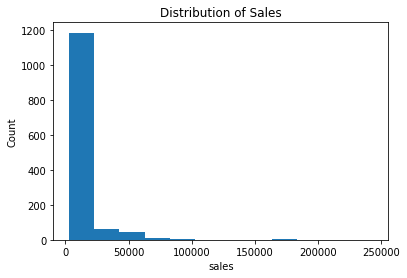

In [1321]:
# Histogram of sales
plt.hist(df['sales'], bins = 12)
plt.xlabel('sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')

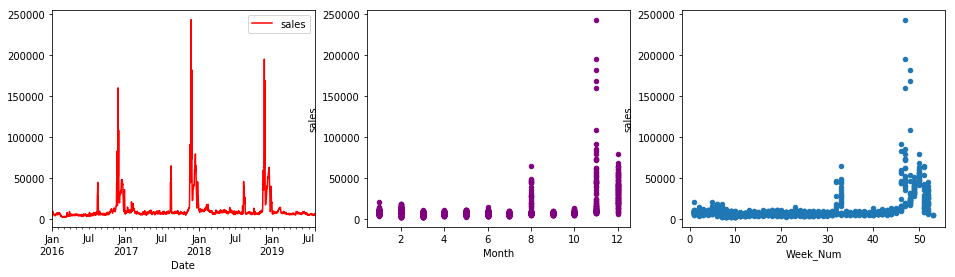

In [1340]:
# Distribution of sales in years (by day/week_number), Season, and day of week
fig, ax = plt.subplots(ncols=3 ,figsize=(16,4))

df.plot(x='Date', y='sales', c='red', ax=ax[0])
df.plot.scatter(x='Month', y='sales', c = 'purple',  ax=ax[1])
df.plot.scatter(x='Week_Num', y='sales', rot=0, ax=ax[2])

plt.show()

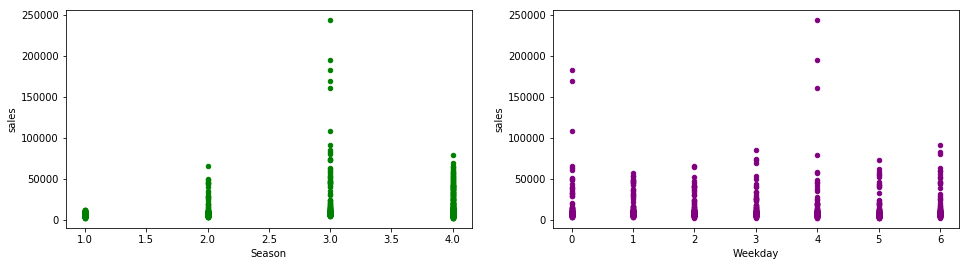

In [1345]:
fig, ax = plt.subplots(ncols=2 ,figsize=(16,4))

df.plot.scatter(x='Season', y='sales', c='green', ax=ax[0])
df.plot.scatter(x='Weekday', y='sales', c='purple', ax=ax[1])


- Highest sales occur around July/August, and from December to February every year
- Highest sales occur around the 32nd weeks and around the 50th weeks
- Highest sales occur in fall
- Highest sales occur on Thuesday and Sunday, and people tend of make more expensive purchases on Friday

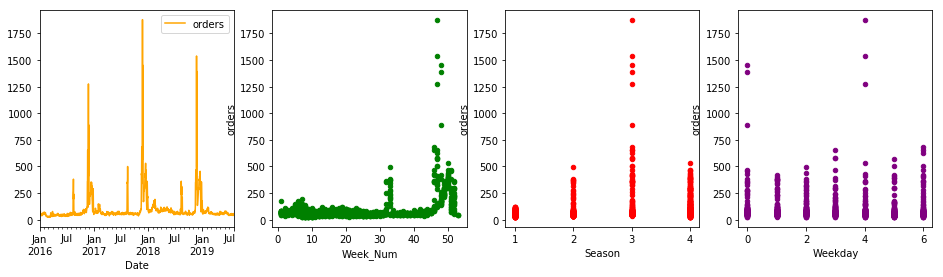

In [1265]:
fig, ax = plt.subplots(ncols=4 ,figsize=(16,4))

df.plot(x='Date', y='orders', c='orange', ax=ax[0])
df.plot.scatter(x='Week_Num', y='orders', c='green', ax=ax[1])
df.plot.scatter(x='Season', y='orders', c='red', ax=ax[2])
df.plot.scatter(x='Weekday', y='orders', c='purple', ax=ax[3])

plt.show()

- Sales and orders have basically the same distribution when it comes yearly, days, week and seasonal 

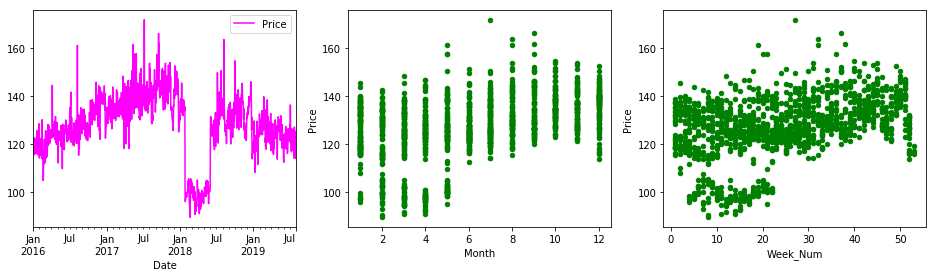

In [1347]:
fig, ax = plt.subplots(ncols=3 ,figsize=(16,4))

df.plot(x='Date', y='Price', c='magenta', ax=ax[0])
df.plot.scatter(x='Month', y='Price', c='green', ax=ax[1])
df.plot.scatter(x='Week_Num', y='Price', c='green', ax=ax[2])

plt.show()

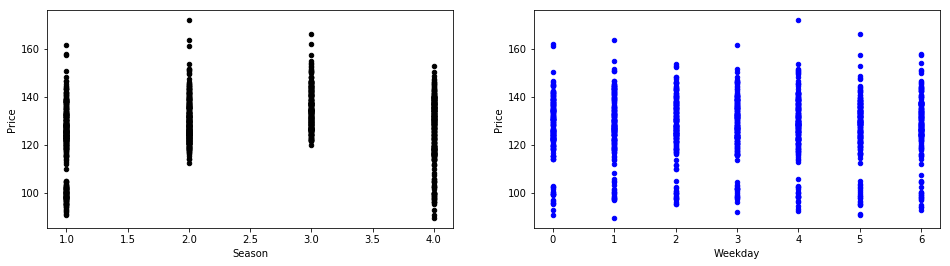

In [1349]:
fig, ax = plt.subplots(ncols=2 ,figsize=(16,4))
df.plot.scatter(x='Season', y='Price', c='black', ax=ax[0])
df.plot.scatter(x='Weekday', y='Price', c='blue', ax=ax[1])
plt.show()

- Price went up from Jan 2016 to about December 2017, then there is a sudden drop in price in Jan 2018 to July 2018 before it gradually returns to normal prices in October 2018
- By week number, a cluster of customer purchases cheaper watches in the beginning of the year (week 5 to week 25) 
- Customers tend to purchase watches that costs more in summer and fall
- Price trend throughout the week is consistent, except a sub group of people tend to make more expensive purchases on Friday 

In [1292]:
df['log_sales'] = np.log(df['sales'])
df.head()

,Date,orders,sales,Cost_Criteo,Cost_FB_P,Cost_FB_R,Cost_GDN_P,Cost_GDN_R,Cost_Pint_P,Cost_Pint_R,...,FB_R/sales,GDN_P/sales,GDN_R/sales,Pint_P/sales,Pint_R/sales,SEM_B/sales,SEM_NB/sales,Podcasts/sales,TV/sales,log_sales
0,2016-01-01,45.428571,5324.794286,0.0,0.0,49.982143,33.241429,176.453571,0.0,0.0,...,0.009387,0.006243,0.033138,0.0,0.0,0.022026,0.022311,0.0,0.0,8.580129
1,2016-01-02,48.642857,5790.447857,0.0,0.0,39.867857,18.130714,71.442143,0.0,0.0,...,0.006885,0.003131,0.012338,0.0,0.0,0.022864,0.012299,0.0,0.0,8.663965
2,2016-01-03,47.785714,5541.456429,0.0,0.0,42.558571,21.433571,84.910714,0.0,0.0,...,0.007680,0.003868,0.015323,0.0,0.0,0.026674,0.009590,0.0,0.0,8.620013
3,2016-01-04,81.500000,9972.320714,0.0,0.0,45.019286,18.827143,65.668571,0.0,0.0,...,0.004514,0.001888,0.006585,0.0,0.0,0.016188,0.009072,0.0,0.0,9.207569
4,2016-01-05,79.714286,9530.935714,0.0,0.0,39.481429,15.142857,66.080000,0.0,0.0,...,0.004142,0.001589,0.006933,0.0,0.0,0.019969,0.011586,0.0,0.0,9.162298


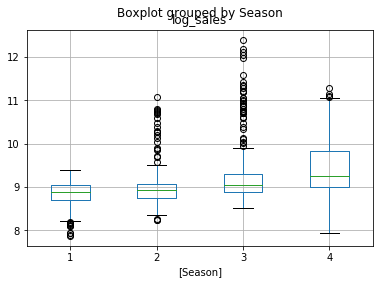

In [1295]:
df[['Season', 'log_sales']].boxplot(by='Season')
plt.show()

- There is an increasing trend of the amount of money shoppers spend on watches in the year (average wise)
- There are more outliers in fall who purhcased higher end watches than any other season

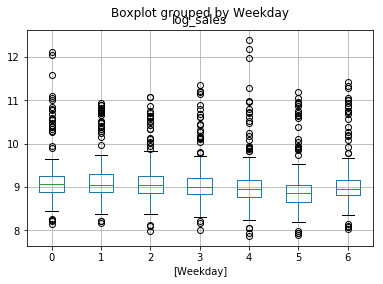

In [1350]:
df[['Weekday', 'log_sales']].boxplot(by='Weekday')
plt.show()

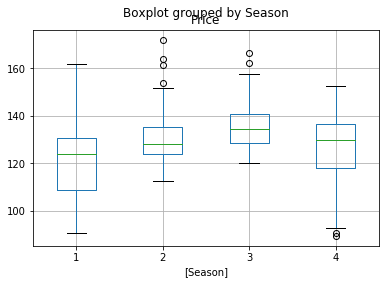

In [1269]:
df[['Season', 'Price']].boxplot(by='Season')

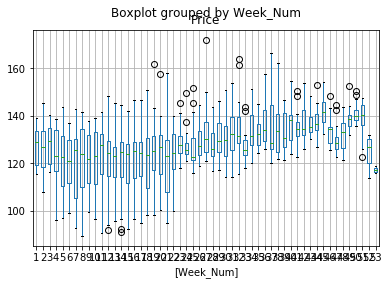

In [1270]:
df[['Week_Num', 'Price']].boxplot(by='Week_Num')

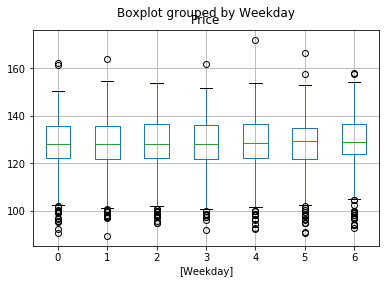

In [1271]:
df[['Weekday', 'Price']].boxplot(by='Weekday')

In [1272]:
print(df.groupby(['Week_Num'])['sales'].sum().nlargest(10).reset_index())
print('='*50)
print(df.groupby(['Week_Num'])['sales'].mean().nlargest(10).reset_index())

   Week_Num         sales
0        47  1.530711e+06
1        50  1.143873e+06
2        48  9.511461e+05
3        49  7.903433e+05
4        46  7.102037e+05
5        51  5.972786e+05
6        33  5.832614e+05
7        52  5.052478e+05
8         6  3.478976e+05
9         5  3.088217e+05
   Week_Num         sales
0        47  72890.988500
1        50  54470.123707
2        48  45292.672651
3        49  37635.395510
4        46  33819.221497
5        51  28441.837074
6        33  27774.352109
7        52  24059.417856
8        32  13929.021769
9         6  12424.915190


In [1273]:
print(df.groupby(['Season'])['sales'].sum().nlargest(4).reset_index())
print(df.groupby(['Season'])['sales'].mean().nlargest(4).reset_index())

   Season         sales
0       4  5.491818e+06
1       3  4.763095e+06
2       2  3.041433e+06
3       1  2.659604e+06
   Season         sales
0       3  17447.234879
1       4  16641.873245
2       2   9025.023429
3       1   7227.184506


In [1301]:
sale_sum = df.groupby(['Weekday'])['sales'].sum().nlargest(7).reset_index()
pd.DataFrame(sale_sum)

sale_mean = df.groupby(['Weekday'])['sales'].mean().nlargest(7).reset_index()
print(pd.DataFrame(sale_mean))

   Weekday         sales
0        0  13940.949687
1        4  13449.953411
2        6  12266.148020
3        1  12062.304914
4        3  11742.515672
5        2  11613.881804
6        5  10312.976986


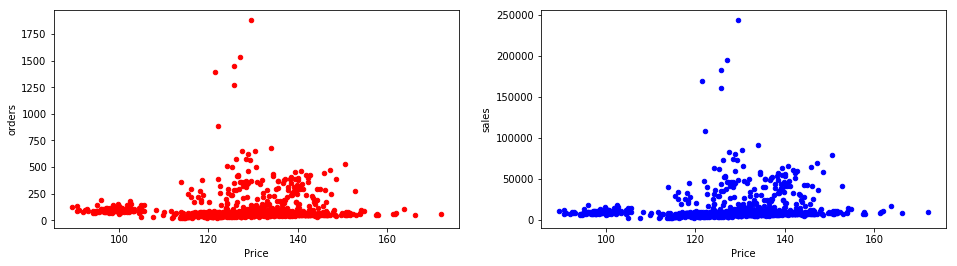

In [1275]:
# Does price have any influence on order or sales?
fig, ax = plt.subplots(ncols=2 ,figsize=(16,4))

df.plot.scatter(x='Price', y='orders', c='red', ax=ax[0])
df.plot.scatter(x='Price', y='sales', c='blue', ax=ax[1])

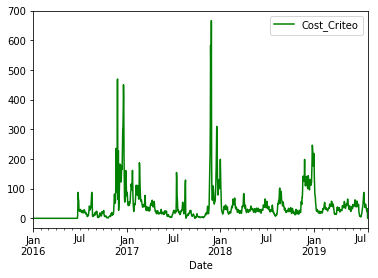

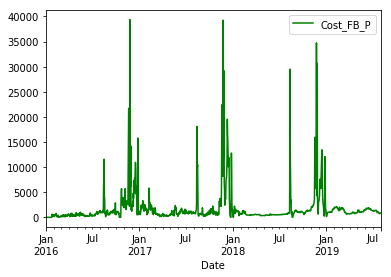

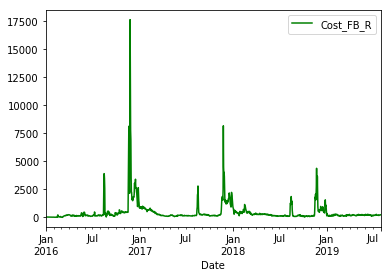

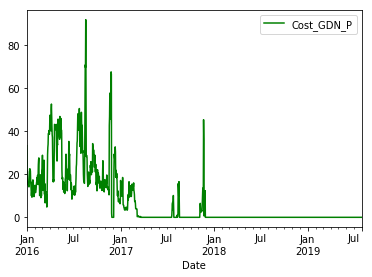

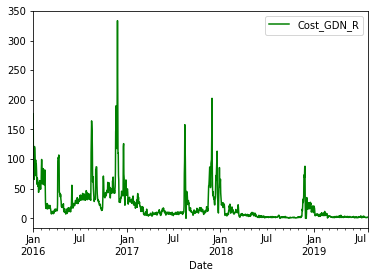

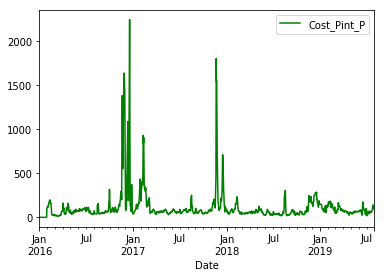

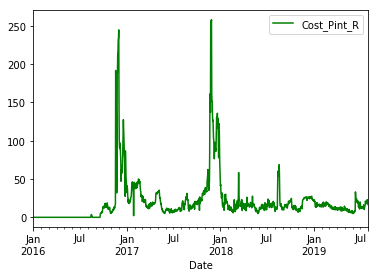

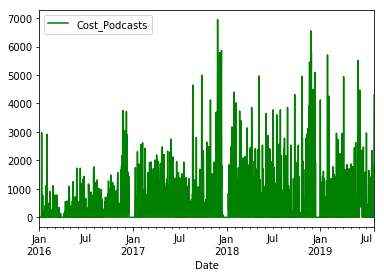

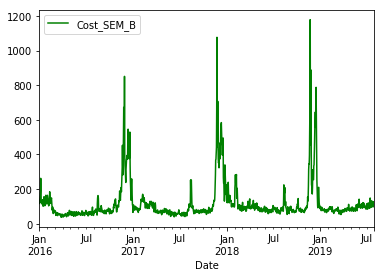

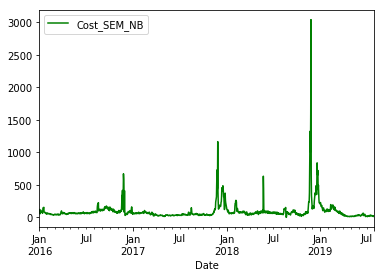

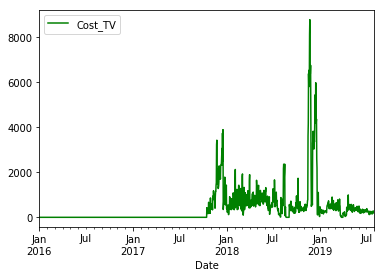

In [1283]:
# Cost and dollar spent on each channel from Jan 2016 to July 2019

cost_list = [i for i in df.columns.values if 'Cost_' in i]
for cost in cost_list:
    df.plot (x = 'Date', y = cost, c = 'green')
    plt.show()   

### Cost spent on each channel from Jan 2016 to Jul 2019
Criteo
- Company did not start using Criteo until the end of June/July 2016
- Most dollars used for Criteo were spent around July/August and November to Feburary period, expecially around November 2018

Facebook
- Similar (more obvious) periodic spending pattern compared to Criteo is observed with FB_P and FB_R
- Company spent the most amount of money in Jan 2017 for FB_R, then the amount decreases over time

GDN
- Money was spent on GDN_P from Jan 2016 to April 2017 (during the initial marketing period) then GEN_P only happens during July/August and November/Jan periods
- Company focuses more on GDN regarting comparing to GDN prospecting, especially during the peak shopping period

Pinterest
- Similar (more obvious) periodic spending pattern compared to Criteo and FB is observed with Pinterest but company stop spending as much money after 2018 compare to the inital period, and company did not start retargetting until Oct/Nov 2016

Podcasts
- Company continuously invest in the Podcast channel from January 2016 to July 2019

SEM_B
- Similar periodic spending pattern compared to Criteo, FB, and Pinterst but in an increasing trend

SEM_NB
- Similar periodic spending pattern compared to Criteo, FB, Pinterst, and SEM_B. Company spent a large amround of money in SEM_NB during the holiday season of 2019

TV
- Company started invested in TV during the holiday season of 2017 and amount peak during the 2019 holidays

There was a drop in sales around March 2016, company did not focus on a any specific marketing channel at the time except GDN_P, Podcasts and SEM_B

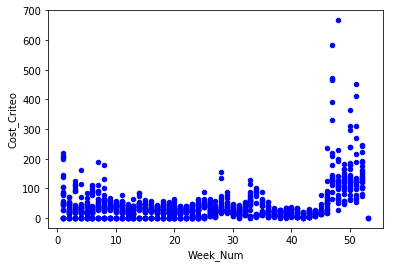

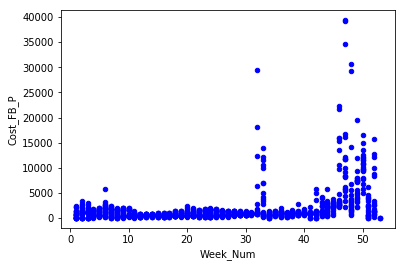

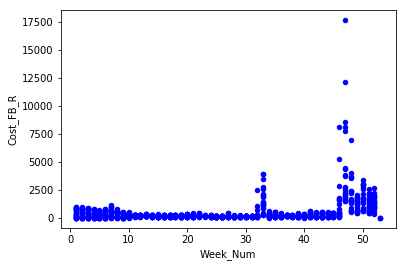

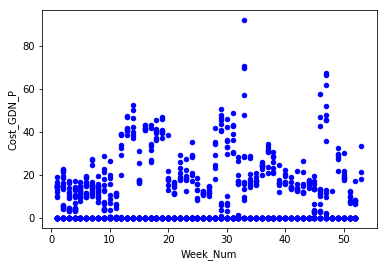

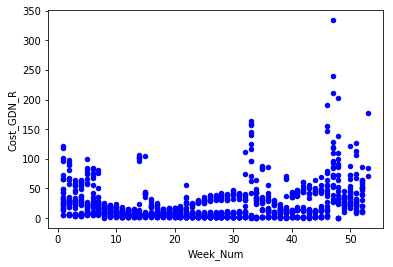

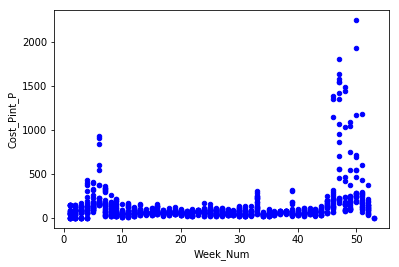

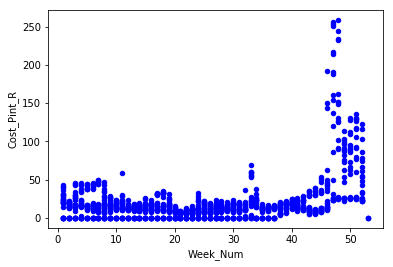

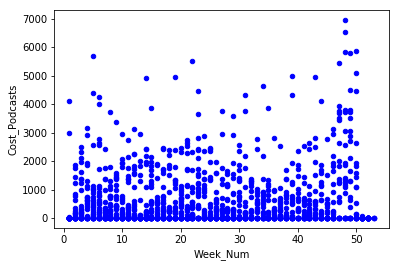

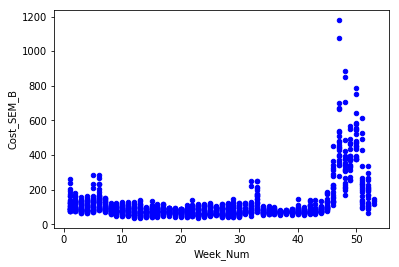

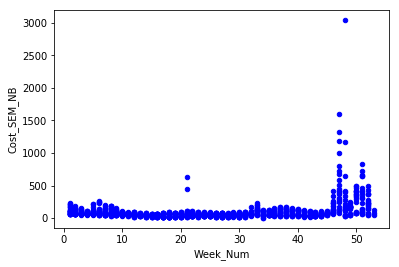

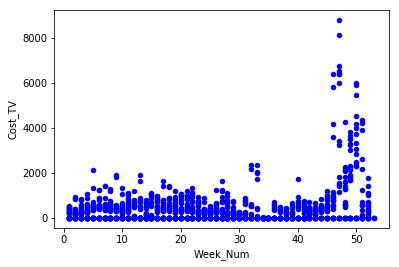

In [1277]:
cost_list = [i for i in df.columns.values if 'Cost_' in i]

for cost in cost_list:
    df.plot.scatter (x = 'Week_Num', y = cost, c = 'blue')
    plt.show()   

Observation: Majority of marketing channels follow the trend seasonality, where most budget are spent around the 35th weeks and around holiday season (November - December) except Podcasts

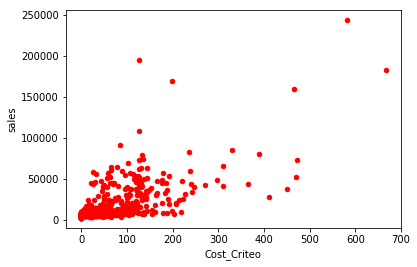

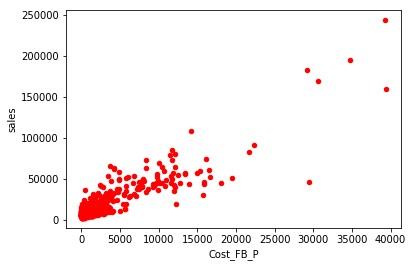

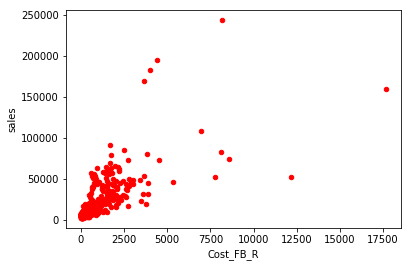

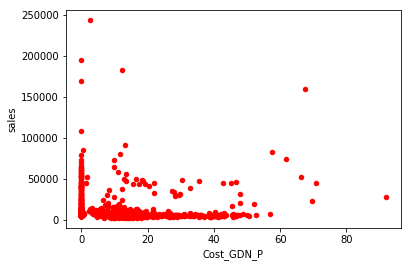

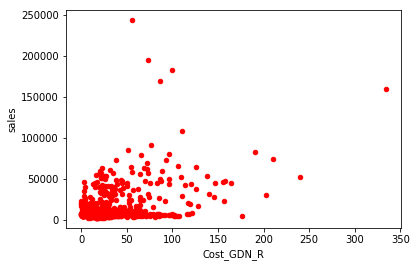

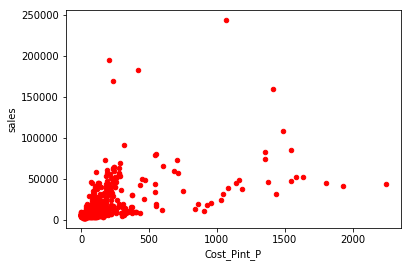

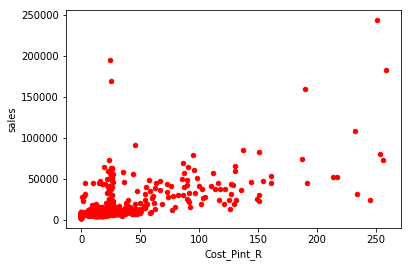

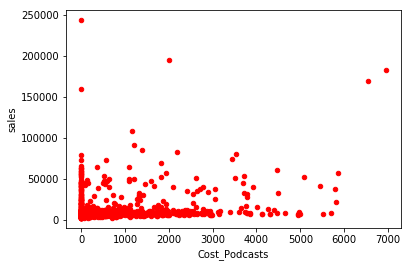

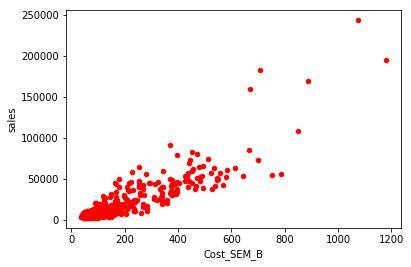

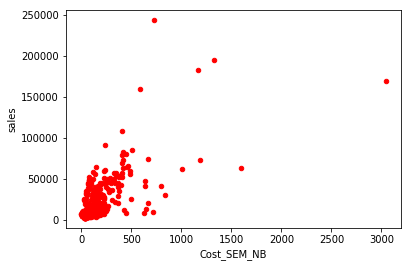

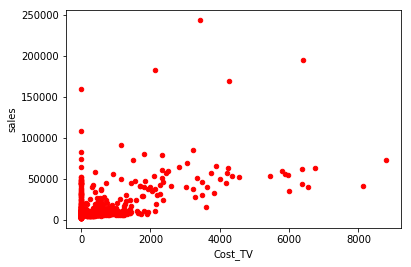

In [1278]:
# Observing dollar amount spent on each channel in relationship to sales 
cost_list = [i for i in df.columns.values if 'Cost_' in i]

for cost in cost_list:
    df.plot.scatter (x = cost, y = 'sales', c = 'red')
    plt.show()

### Relationship between amount spent on each channel vs Sales

Criteo
- Some linear trend is observed between Criteo vs Sales

Facebook
- Clear linear trend is observed between FB_P vs Sales
- Clear linear trend is observed between FB_R vs Sales with greater slope, which means FB_R drives more sales than FB_P

GDN
- No clear linear trend is observed between GDN_P vs Sales, explain why this channel is shut down
- No clear linear trend is observed between GDN_R vs sales either

Pinterest
- Some linear trend is observed between Pint_P and Pint_R but with a lower slope than Facebook

Podcasts
- No clear linear trend is observed 
 
SEM
- Clear linear trend is observed between SEM_B vs Sales
- Clear linear trend is observed between SEM_NB vs Sales with greater slope

TV
- Some linear trend is observed


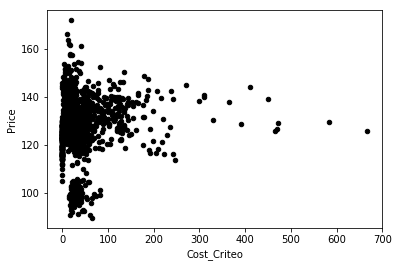

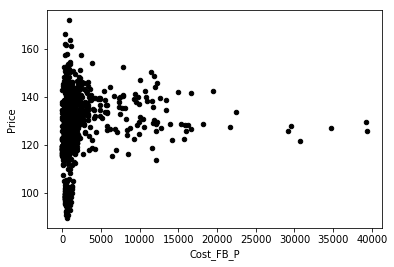

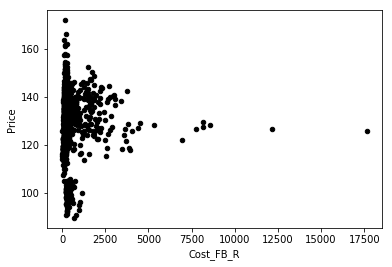

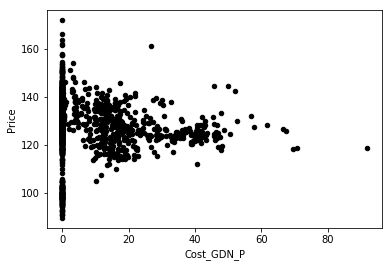

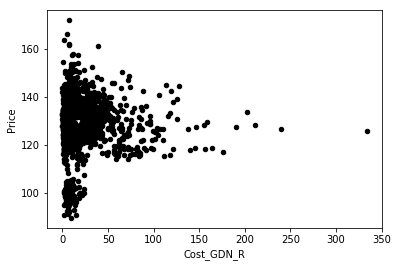

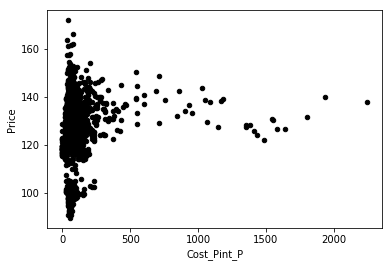

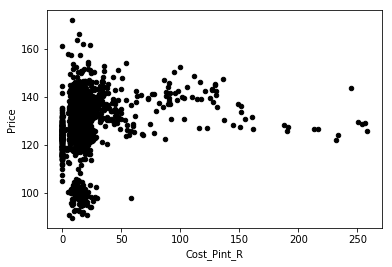

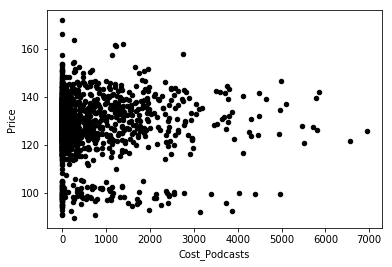

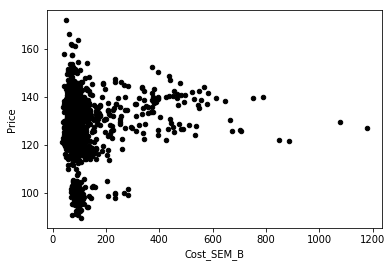

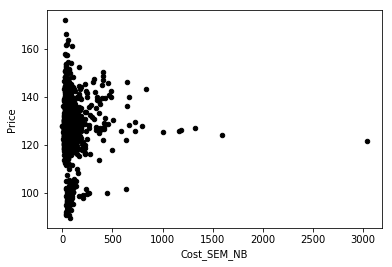

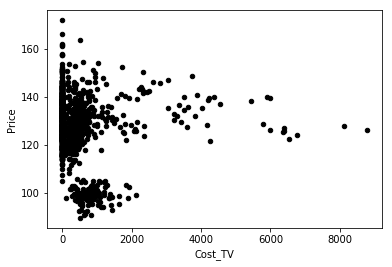

In [1288]:
cost_list = [i for i in df.columns.values if 'Cost_' in i]

for cost in cost_list:
    df.plot.scatter (x = cost, y = 'Price', c = 'black')
    plt.show()

- No trend is obeserved between each marketing channel to the price customers are spending per transaction

In [1289]:
df_sub = df[(df['Date'] > '2018-01-10') & (df['Date'] < '2018-07-01')]
df_sub.head()

,Date,orders,sales,Cost_Criteo,Cost_FB_P,Cost_FB_R,Cost_GDN_P,Cost_GDN_R,Cost_Pint_P,Cost_Pint_R,...,FB_P/sales,FB_R/sales,GDN_P/sales,GDN_R/sales,Pint_P/sales,Pint_R/sales,SEM_B/sales,SEM_NB/sales,Podcasts/sales,TV/sales
741,2018-01-11,86.500000,11906.480710,15.897625,1572.051429,484.597143,0.0,18.225000,34.820000,13.113571,...,0.132033,0.040700,0.0,0.001531,0.002924,0.001101,0.010089,0.004660,0.014698,0.033298
742,2018-01-12,79.928571,10661.177140,19.191587,1487.319286,512.264286,0.0,19.124286,42.136429,13.919286,...,0.139508,0.048050,0.0,0.001794,0.003952,0.001306,0.012720,0.005253,0.000000,0.036220
743,2018-01-13,71.714286,9471.955714,22.328133,1479.337143,524.797143,0.0,25.100000,51.966429,17.841429,...,0.156181,0.055405,0.0,0.002650,0.005486,0.001884,0.017264,0.007101,0.000000,0.096405
744,2018-01-14,80.571429,10936.957140,30.359022,1142.306429,525.447143,0.0,23.791429,52.932857,18.493571,...,0.104445,0.048043,0.0,0.002175,0.004840,0.001691,0.014796,0.006364,0.000000,0.077829
745,2018-01-15,78.500000,10573.750710,36.962631,1083.175000,455.813571,0.0,21.944286,61.837143,9.161429,...,0.102440,0.043108,0.0,0.002075,0.005848,0.000866,0.013165,0.006576,0.129145,0.036657


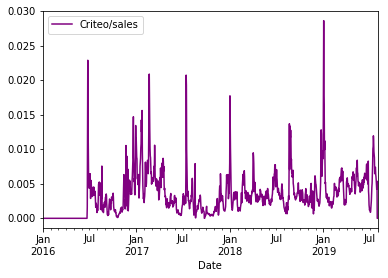

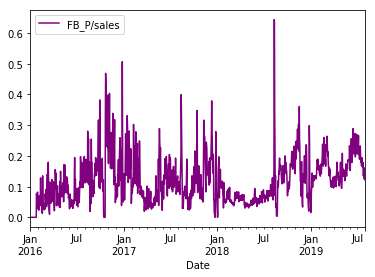

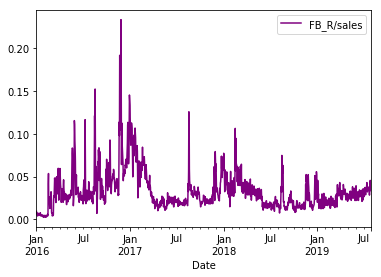

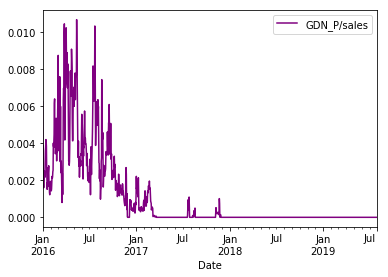

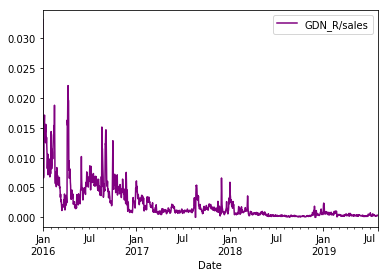

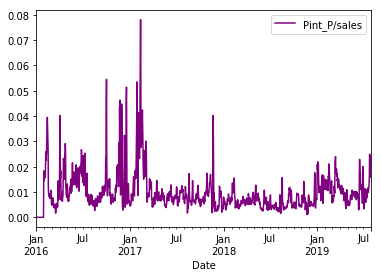

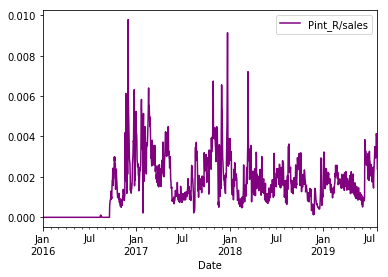

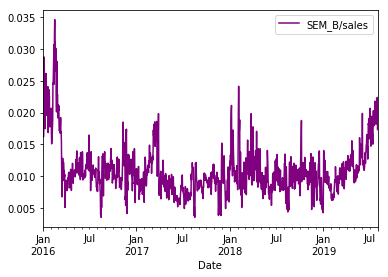

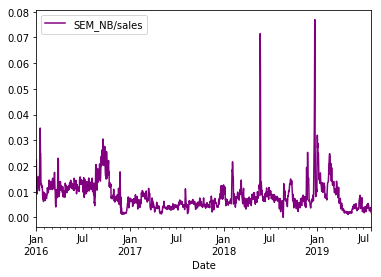

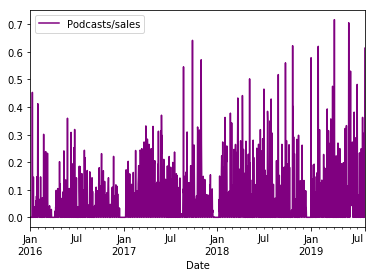

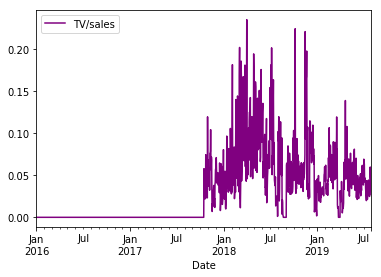

In [1302]:
# Observing ratio of money spent on each marketing channel to sales

ratio_list = [i for i in df.columns.values if '/sales' in i]

for ratio in ratio_list:
    df.plot(x = 'Date', y = ratio, c = 'purple')
    plt.show()      

- FB_P and Podcasts are observed to have the highest ratio between cost vs sales, which means the most money is spent on these two channels to drive sales

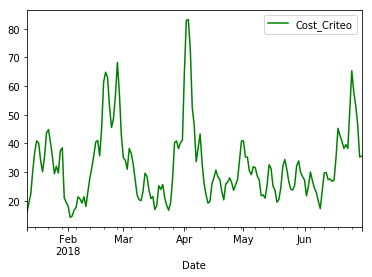

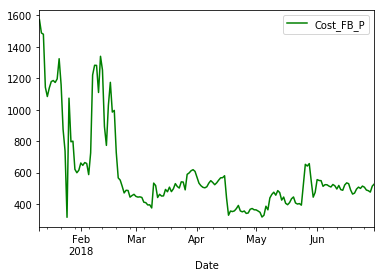

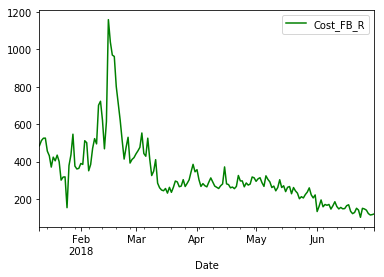

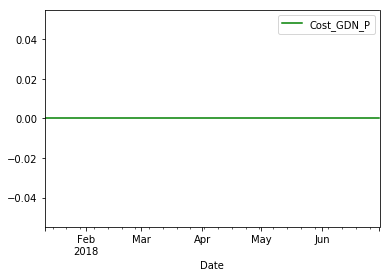

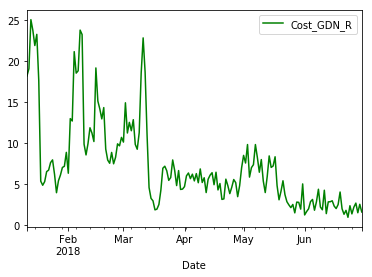

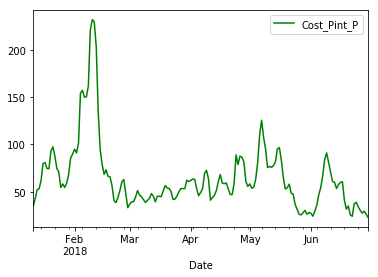

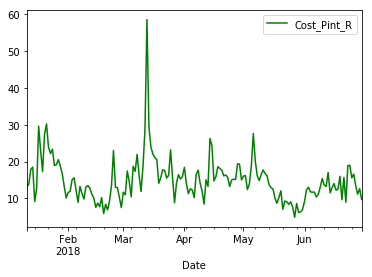

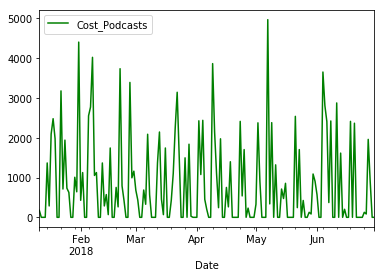

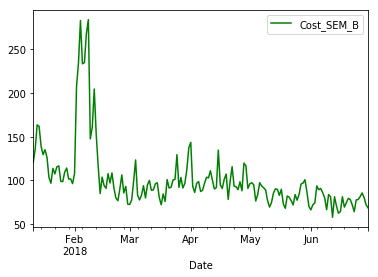

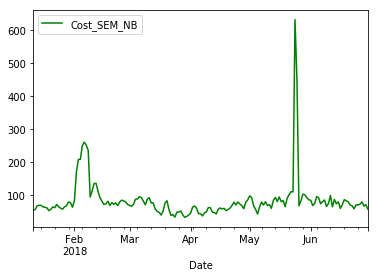

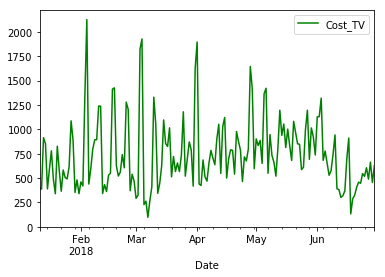

In [1291]:
# Obeserve what happened durign the period that price dropped from January 2018 to August 2018
cost_list = [i for i in df_sub.columns.values if 'Cost_' in i]

for cost in cost_list:
    df_sub.plot(x = 'Date', y = cost, c = 'green')
    plt.show()

From Jan 18 to Aug 18
- Relative high cost were spent in the beginning (Jan to March) then cost decreased with FB_P, FB_R
- No cost was dedicated to GDN_P
- Same trend observed with GDN_R, Pint_P, and SEM_B to FB
- Cost surge observed in mid March with Pint_R
- Cost was consistently spent in Podcasts
- Cost surge observed in June with SEM_NB
- Cost was spent consistently with TV but the amount spent gradually decreased from Jan - Aug 2018

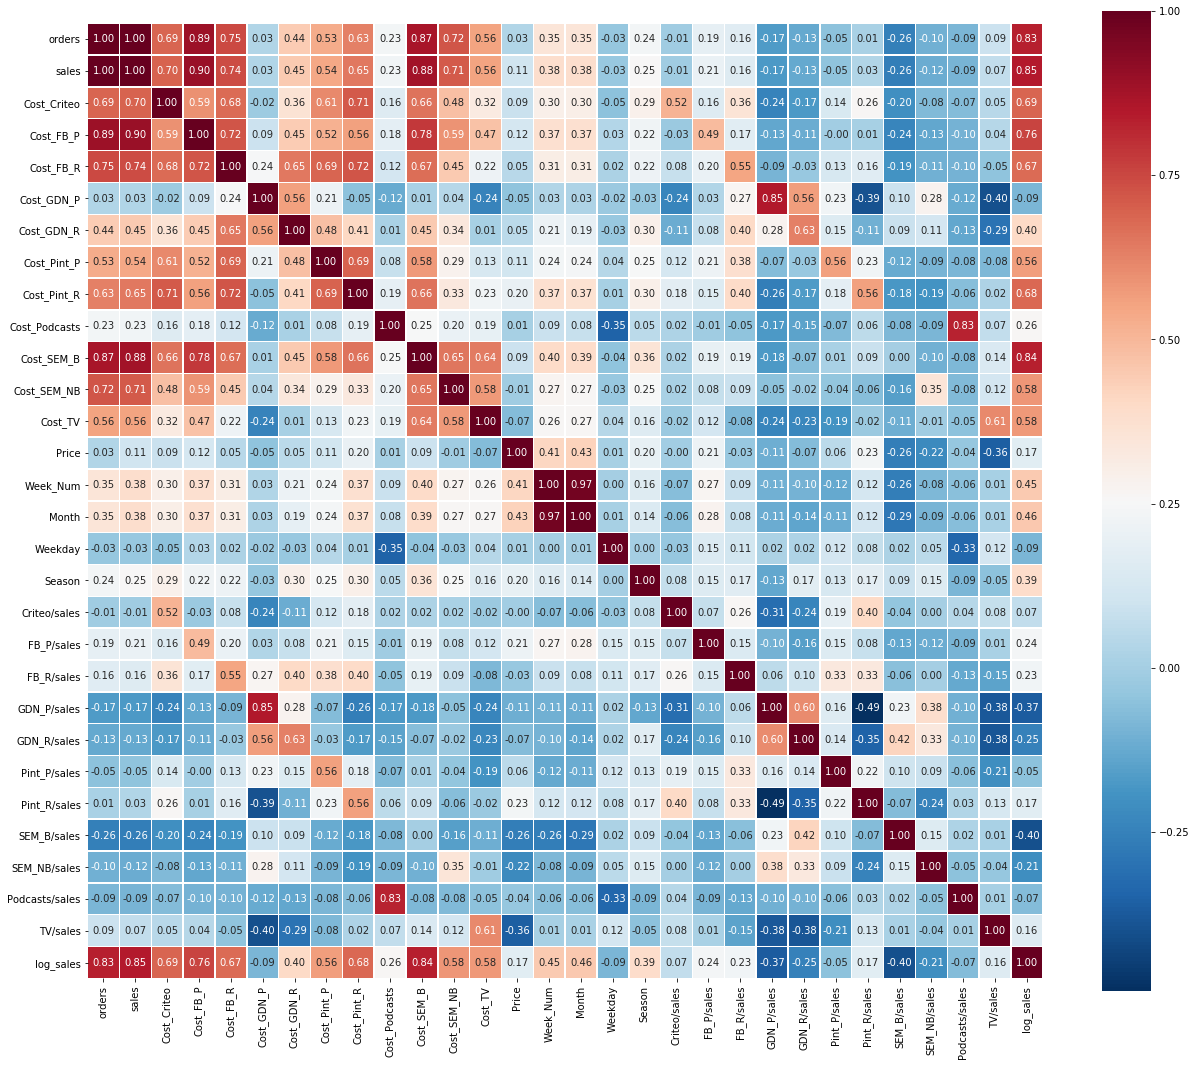

In [1297]:
plt.figure(figsize=(18,15))
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [1187]:
# Correlation of each feature with sales
df.corr(method='pearson').iloc[1].sort_values(ascending=False)

sales             1.000000
orders            0.995843
Cost_FB_P         0.898649
Cost_SEM_B        0.881580
Cost_FB_R         0.742117
Cost_SEM_NB       0.709636
Cost_Criteo       0.696193
Cost_Pint_R       0.645166
Cost_TV           0.556349
Cost_Pint_P       0.540101
Cost_GDN_R        0.447751
Week_Num          0.384010
Month             0.383908
Season            0.254250
Cost_Podcasts     0.229328
FB_P/sales        0.205975
FB_R/sales        0.157828
Price             0.105678
TV/sales          0.070011
Cost_GDN_P        0.029469
Pint_R/sales      0.028756
Criteo/sales     -0.012510
Weekday          -0.029389
Pint_P/sales     -0.047471
Podcasts/sales   -0.090017
SEM_NB/sales     -0.117667
GDN_R/sales      -0.130047
GDN_P/sales      -0.172156
SEM_B/sales      -0.264216
Name: sales, dtype: float64

In [1188]:
# Correlation of each feature with orders
df.corr(method='pearson').iloc[0].sort_values(ascending=False)

orders            1.000000
sales             0.995843
Cost_FB_P         0.893260
Cost_SEM_B        0.868886
Cost_FB_R         0.746959
Cost_SEM_NB       0.722274
Cost_Criteo       0.689567
Cost_Pint_R       0.627406
Cost_TV           0.555787
Cost_Pint_P       0.529168
Cost_GDN_R        0.444741
Week_Num          0.351250
Month             0.350202
Season            0.235695
Cost_Podcasts     0.232820
FB_P/sales        0.189766
FB_R/sales        0.164122
TV/sales          0.093560
Price             0.031766
Cost_GDN_P        0.030198
Pint_R/sales      0.014148
Criteo/sales     -0.011920
Weekday          -0.031918
Pint_P/sales     -0.054317
Podcasts/sales   -0.085184
SEM_NB/sales     -0.103619
GDN_R/sales      -0.130019
GDN_P/sales      -0.170926
SEM_B/sales      -0.256649
Name: orders, dtype: float64

### Channels and their correlation (linear) to Sales and Orders
- Cost_FB_P         0.898649
- Cost_SEM_B        0.881580
- Cost_FB_R         0.742117
- Cost_SEM_NB       0.709636
- Cost_Criteo       0.696193
- Cost_Pint_R       0.645166
- Cost_TV           0.556349
- Cost_Pint_P       0.540101
- Cost_GDN_R        0.447751
- Cost_Podcasts     0.229328